In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

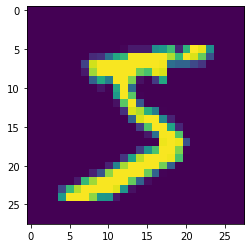

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()


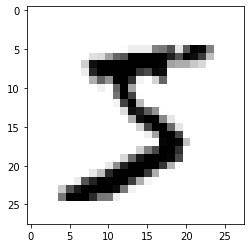

In [6]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
print(y_train[0])

5


In [9]:
import numpy as np 

In [10]:
#normalizig the dataset
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)



In [11]:
    # Create a neural network model
    # Add one flattened input layer for the pixels
    # Add two dense hidden layers
    # Add one dense output layer for the 10 digits
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))


In [12]:
# Compiling and optimizing model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
model.fit(X_train, y_train, epochs=3)

    # Evaluating the model
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2648 - accuracy: 0.9219
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1054 - accuracy: 0.9669
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0880 - accuracy: 0.9742
0.08801499009132385
0.9742000102996826


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
print("total training samples",len(X_train))

total training samples 60000


In [15]:
model.save("hand_model.model")

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss", test_loss)
print("validation accuracy",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.9742
test loss 0.08801499009132385
validation accuracy 0.9742000102996826


In [17]:
predict= model.predict([X_test])
print(predict)

[[6.57497656e-09 8.17918391e-08 4.45242858e-06 ... 9.99845147e-01
  5.77889629e-08 2.04928619e-06]
 [3.75384945e-10 1.02732517e-03 9.98946369e-01 ... 3.69491495e-08
  3.04121563e-08 7.30937880e-13]
 [6.00979746e-08 9.99707401e-01 1.86784255e-05 ... 5.60936351e-05
  1.07567408e-04 2.06223262e-06]
 ...
 [3.78720211e-09 2.28481622e-06 5.41261933e-08 ... 3.85492167e-05
  1.54224506e-06 3.61367383e-05]
 [1.15157320e-07 1.05894827e-07 4.39270025e-08 ... 1.71293877e-07
  1.73471798e-03 5.31384003e-08]
 [9.90735953e-06 1.45703007e-06 5.92273693e-07 ... 6.56975085e-10
  2.30061778e-06 1.24674395e-08]]


In [18]:
print(np.argmax(predict[4]))

4


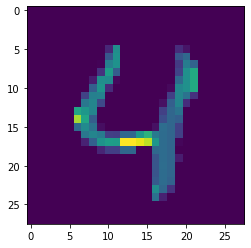

In [19]:
plt.imshow(X_test[4])

In [20]:
import cv2

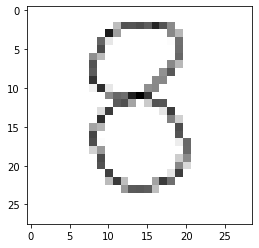

In [22]:
img = cv2.imread('/content/paintz8.png')
plt.imshow(img)

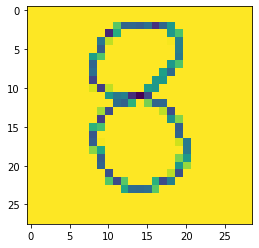

In [25]:
#change to gray
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [27]:
gray.shape

(28, 29)

In [28]:
#resize
resized= cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [29]:
print(resized.shape)

(28, 28)


In [30]:
newimg= tf.keras.utils.normalize(resized, axis=1)

In [31]:
IMG_SIZE=28

In [32]:
newimg=np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [33]:
newimg.shape

(1, 28, 28, 1)

In [34]:
prediction= model.predict(newimg)

In [35]:
print(prediction)

[[3.1847343e-02 1.1378436e-03 9.5202297e-02 3.0665496e-02 2.6215079e-05
  2.8109867e-02 3.2909907e-02 4.1194187e-05 7.5544912e-01 2.4610728e-02]]


In [36]:
print(np.argmax(prediction))

8
